###*Librerías:*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial import ConvexHull
import scipy.cluster.hierarchy as shc
from scipy import interpolate



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path_data = '/content/gdrive/MyDrive/AprendizajeAutomatico/Proyecto2/Dataset/'

 ## 1) Cargar y Analizar datos 

In [4]:
df_X = pd.read_csv(path_data + "dataset_tissue.txt",header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_y = pd.read_csv(path_data + "clase.txt")

In [6]:
df_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189
0,NaN,GSM11805.CEL.gz,GSM11814.CEL.gz,GSM11823.CEL.gz,GSM11830.CEL.gz,GSM12067.CEL.gz,GSM12075.CEL.gz,GSM12079.CEL.gz,GSM12098.CEL.gz,GSM12105.CEL.gz,GSM12268.CEL.gz,GSM12270.CEL.gz,GSM12283.CEL.gz,GSM12298.CEL.gz,GSM12300.CEL.gz,GSM12399.CEL.gz,GSM12444.CEL.gz,GSM21203.cel.gz,GSM21204.cel.gz,GSM21205.cel.gz,GSM21206.cel.gz,GSM21207.cel.gz,GSM21208.cel.gz,GSM21209.cel.gz,GSM21210.cel.gz,GSM21212.cel.gz,GSM21213.cel.gz,GSM21214.cel.gz,GSM21215.cel.gz,GSM21216.cel.gz,GSM21217.cel.gz,GSM21218.cel.gz,GSM21219.cel.gz,GSM21220.cel.gz,GSM21221.cel.gz,GSM21222.cel.gz,GSM21223.cel.gz,GSM21224.cel.gz,GSM21225.cel.gz,GSM21226.cel.gz,...,GSM296876.CEL.gz,GSM296878.CEL.gz,GSM296879.CEL.gz,GSM296880.CEL.gz,GSM296881.CEL.gz,GSM296882.CEL.gz,GSM296883.CEL.gz,GSM296886.CEL.gz,GSM296887.CEL.gz,GSM296888.CEL.gz,GSM296889.CEL.gz,GSM296890.CEL.gz,GSM296891.CEL.gz,GSM296892.CEL.gz,GSM298747.CEL.gz,GSM298748.CEL.gz,GSM298749.CEL.gz,GSM298750.CEL.gz,GSM299110.CEL.gz,GSM299111.CEL.gz,GSM299112.CEL.gz,GSM299113.CEL.gz,GSM299244.CEL.gz,GSM299245.CEL.gz,GSM299246.CEL.gz,GSM299247.CEL.gz,GSM322969.CEL.gz,GSM323054.CEL.gz,GSM323523.CEL.gz,GSM323524.CEL.gz,GSM323527.CEL.gz,GSM323565.CEL.gz,GSM323566.CEL.gz,GSM323567.CEL.gz,GSM246492.CEL.gz,GSM246493.CEL.gz,GSM246494.CEL.gz,GSM307639.CEL.gz,GSM307640.CEL.gz,GSM307641.CEL.gz
1,1007_s_at,10.1912666822211,10.5091673351314,10.2720269492085,10.2529517194729,10.1576049232494,9.96678172954019,9.83934832974126,9.94565197248459,9.91303106658949,10.1703442352627,9.45741516459495,10.1268870842942,10.4664257211086,9.96973019146674,10.5121768610885,9.95450017020545,11.1661182948376,10.9193004184946,11.0678993819025,11.1575067884347,11.3909872514754,10.8893268779711,11.6674305963941,11.2224508965785,11.8980275522044,11.4005381634261,10.9554282879219,10.3613396030431,10.7713015923524,10.2729775883915,10.7577343093115,11.3710138413383,10.9145143242311,10.5733162818254,11.226524954963,11.2434148575111,11.5752925740283,11.439543606024,11.0091200286927,...,9.7438553491072,10.6268250644816,10.1869270411132,10.508279820866,10.1598762431507,10.0139876125165,10.3438273905478,9.42615024691931,9.73275319677367,9.50555151244813,9.48949624814516,9.66996618355174,9.47732823312598,9.64515835633352,8.43069217011524,8.36249162745909,8.74633699086119,8.28093335458315,8.43069217011524,8.74633699086119,8.28093335458315,8.36249162745909,8.60128453049111,8.71478700428553,8.70964489940597,8.60003322411806,11.9203168072586,11.9199308840961,11.7475581422531,11.8050230447292,11.7977429508911,10.0408856560396,11.2850015141002,9.88869303106195,9.66112701032859,9.80368609168733,10.509541139819,9.98450196102648,9.937738353465,10.3067812624519
2,1053_at,6.04046250272039,6.69607547976383,6.14466254544271,6.57515280822761,6.60670108954106,6.06006947550896,6.18659649538593,5.92786079541114,6.33747800246302,6.04578949020755,6.28045680584742,5.8820250788601,6.20386428735536,5.98704584004713,6.44974762857492,6.16135361316097,5.85341425533468,5.66195051704774,5.78546301937077,5.83184640502122,5.92485231935363,5.65269599858264,5.7851899513821,5.71290616500019,5.67639701767653,5.67604572437136,5.77678078055937,5.66363352615535,5.79195544541786,5.71326568521361,5.98417045362349,5.73676794239041,5.85033237854461,5.84452802265255,5.82092891956222,5.76844652528373,5.87493462673938,5.9852946946925,5.75032209199468,...,6.06864996117201,6.11387494679427,6.10892396598725,6.19370418739918,6.30362481201124,5.97965772050543,6.11515935415871,6.22104762390989,5.88796174145619,5.9737764677932,6.04511253628362,5.85342634904806,6.11278451975375,6.1587456318772,5.84538275566591,6.07283729777204,6.00484726702444,6.16278103988501,5.84538275566591,6.00484726702444,6.16278103988501,6.07283729777204,6.04947854654

In [7]:
df_y["label"] = df_y.x
tissue = {'kidney': 0,'hippocampus': 1, 'cerebellum':2, 'colon':3, 'liver':4, 'endometrium':5 , 'placenta':6}
df_y.label = [tissue[item] for item in df_y.x]

In [8]:
df_y

,Unnamed: 0,x,label
0,1,kidney,0
1,2,kidney,0
2,3,kidney,0
3,4,kidney,0
4,5,kidney,0
...,...,...,...
184,185,placenta,6
185,186,placenta,6
186,187,placenta,6
187,188,placenta,6


In [9]:
df = df_X.T
df.columns = df.iloc[0] 
df = df[1:]

In [10]:
df.head()

,NaN,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,...,65472_at,65493_at,65517_at,65521_at,65585_at,65588_at,65591_at,65630_at,65635_at,65718_at,65770_at,65884_at,66053_at,71933_at,74694_s_at,76897_s_at,77508_r_at,78047_s_at,78330_at,78383_at,78495_at,79005_at,81737_at,81811_at,823_at,87100_at,89476_r_at,89948_at,89977_at,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
1,GSM11805.CEL.gz,10.1912666822211,6.04046250272039,7.44740927631719,12.0250418580982,5.26926852837967,8.5351755175356,6.92169017840876,5.71818950197561,8.08207586251632,5.4343038591494,7.03732332778038,8.84582506918152,7.60099267048579,11.2507743582067,10.2924919148508,8.89140257310956,6.36719901709473,5.58498342540445,10.138549844734,5.96226772625265,9.74133872599839,11.0483422206484,12.2840256481627,12.8500641392536,12.2985509796135,11.3352621737399,12.0026701387003,12.2720619870904,7.61463542406428,11.540988391386,12.2614929565085,10.4004907976329,13.2253005548735,12.6910777751019,10.9046993196314,11.9405137831795,13.0309379340867,12.6433006178978,13.0946641694015,...,5.3821,6.23802,8.61315,9.02314,8.2739,7.31596,8.78746,6.54297,10.5587,6.88092,9.96513,8.02107,5.35623,9.02535,8.10833,4.55466,10.0045,10.676,6.89269,7.39145,7.77419,8.96205,6.6538,7.93684,8.41055,4.85809,8.53107,8.14928,7.45812,9.82205,8.10842,5.25107,7.09866,8.2104,7.73674,6.43485,5.70045,9.21116,8.33913,7.3678
2,GSM11814.CEL.gz,10.5091673351314,6.69607547976383,7.77535403522073,12.0078171043575,5.18038911358425,8.587241289342,6.96242995259997,5.59604207468944,7.56817804399081,5.2813193697471,7.05400294364185,8.49772641709013,7.47070823898123,10.8564846368388,10.4523359145761,9.65900175812274,6.49979865835175,5.49357369374885,10.2584042694331,6.52555089221627,10.1911409721214,11.9483578329762,12.7831018647484,13.3930857382224,12.0530112310463,10.9901129851467,11.7930395233171,11.6322444978387,9.36705094009866,11.7433101730443,12.5017872160544,10.384815347749,13.0189303155303,12.9760009971139,10.8257072228674,11.7622316671911,12.7942979299463,12.47605514254,13.0321616459517,...,5.3577,6.41995,8.05033,9.15007,8.16858,8.03976,8.90324,6.45544,11.0141,6.97063,10.178,9.20602,5.35626,8.98624,8.55437,4.73717,10.1528,10.6481,7.06716,7.13983,7.98845,8.68649,6.75585,8.24048,8.80185,5.00997,9.23404,8.15132,7.92987,10.1756,8.07281,5.40934,6.90583,8.32251,8.19208,7.67699,6.56648,9.41598,8.21443,7.91775
3,GSM11823.CEL.gz,10.2720269492085,6.14466254544271,7.69623476959699,11.6332792792521,5.30171442164641,8.27741390907574,7.05463287965406,5.57695175207051,7.13647372065342,5.28291624691961,7.33172843621136,9.28976819209627,7.87383637235041,11.0291715579688,10.4522400391069,8.62693598765211,6.41503438883049,5.62496993527305,10.6710118674441,6.78180639520215,10.0053761305511,11.627641347933,12.1475916136576,12.2036363690083,12.2070912294417,10.6235753095137,11.9056864679966,12.3589601239659,9.61526690737048,11.5143577203625,12.2911657675556,10.3775267360705,13.2521033476723,12.5225695529831,10.5133558363664,11.2751206659767,12.9040301109747,12.6717827830881,12.9360637290597,...,5.27198,5.89561,9.21733,9.12758,8.61605,6.64352,9.24899,6.32881,10.9258,6.49601,10.2157,8.02773,5.2879,9.27777,6.75011,4.61444,10.3816,10.8019,7.19728,7.38758,7.47847,8.67063,6.31275,7.48826,7.91186,5.07638,9.18561,8.54856,8.17531,10.2586,7.80969,5.29768,6.71854,8.40471,7.9619,6.425,5.64128,8.19291,8.4561,7.59846
4,GSM11830.CEL.gz,10.2529517194729,6.57515280822761,8.47813486959629,11.0752858549853,5.37223512307381,8.60364959947184,7.11506741604452,5.86055078404275,8.6050906919614,5.37539149682214,7.56547796928126,9.01525522834794,7.89077328926688,11.2428297037025

In [11]:
X = df.iloc[:,1:]

In [12]:
X.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,...,65472_at,65493_at,65517_at,65521_at,65585_at,65588_at,65591_at,65630_at,65635_at,65718_at,65770_at,65884_at,66053_at,71933_at,74694_s_at,76897_s_at,77508_r_at,78047_s_at,78330_at,78383_at,78495_at,79005_at,81737_at,81811_at,823_at,87100_at,89476_r_at,89948_at,89977_at,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
count,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,...,189.000000,189.00000,189.00000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000
unique,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,...,185.000000,185.00000,185.00000,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.0000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.00000,185.000000
top,8.74633699086119,6.00484726702444,8.88533306840808,10.4742744953841,5.24239533405249,8.36732269832422,7.22707230493075,5.70122946558686,7.09362444995617,10.6144129283435,7.22206517484877,8.58552184343574,10.5374903558616,10.6171107294713,10.1623566032011,9.21025191884099,6.21128970580448,5.89475107703178,10.3171564071336,6.59514607734212,10.3176606918018,10.8768110296756,12.39735249782,12.1972030747134,11.644777397551,9.62541702401008,11.875552987322,11.7573974715267,11.0058470605243,11.296726385332,12.0690916882258,8.02405649615574,12.7474019408212,12.3755716221822,10.0194872928216,10.3171517324038,12.4025118055256,11.9060271744914,12.2895182820885,12.3570972536407,...,5.214277,5.90312,7.76931,9.347003,7.641716,7.18934,8.545026,6.407212,10.811261,6.479463,10.043745,8.404753,5.260522,7.990333,5.7959,4.580025,10.268362,10.245913,6.914682,6.880791,7.571675,8.457493,6.399979,7.554416,6.76997,5.690332,9.752793,7.995893,9.822159,9.955259,7.578871,5.540149,6.689905,8.018022,8.415041,7.541678,5.903746,7.420331,8.07467,7.950923
freq,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2.000000,2.00000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000


In [13]:
X_standardized = StandardScaler().fit_transform(X)

In [14]:
print(X_standardized.shape)
print(np.mean(X_standardized),np.std(X_standardized))

(189, 22215)
1.860704104948942e-18 1.0


In [15]:
X_standardized

array([[-0.08394318, -0.26896386, -0.66877899, ...,  2.36828885,
        -0.7437041 , -1.39344865],
       [ 0.28756536,  2.07429885, -0.09167218, ...,  2.73742686,
        -1.00699415,  0.00883984],
       [ 0.01043577,  0.10346329, -0.23090376, ...,  0.53311048,
        -0.49675351, -0.80529805],
       ...,
       [-0.32557484,  2.14545647, -1.24354797, ...,  1.54408879,
        -0.70876003, -0.01674819],
       [-0.38022424,  2.57505219, -1.23471674, ...,  0.53784596,
        -0.21543834, -0.73030421],
       [ 0.05105073,  3.25188256, -0.7387927 , ...,  2.74923947,
        -0.75457855,  0.36275341]])

In [16]:
print(df_y.groupby('label')['x'].count())
y_test = np.array(df_y.iloc[:,2:3]).reshape(1,-1)[0]
print(y_test)

label
0    39
1    31
2    38
3    34
4    26
5    15
6     6
Name: x, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 0 0 0 4 4 4 0 0 0 4 4 4 0 0 2 1 4 4 4 4 4 4 2 2 4 4 0 0
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 6 6
 6 6 6 6]


Visualizando los clusters de las etiquetas de entrada usando PCA con 2 componentes 

In [17]:
n_components=2
pca_c2 = PCA(n_components=n_components)
X_reduced_c2 = pca_c2.fit_transform(X_standardized)

In [18]:
print('Variacion individual de {} principal components:'.format(n_components))
print('{}'.format(np.round(pca_c2.explained_variance_ratio_, decimals=4)*100))
print('Variacion acumulada de {} principal components:'.format(n_components))
print('{}'.format(np.cumsum(np.round(pca_c2.explained_variance_ratio_, decimals=4)*100)))

Variacion individual de 2 principal components:
[19.51 12.33]
Variacion acumulada de 2 principal components:
[19.51 31.84]


In [19]:
df_reduced_test = pd.DataFrame(data = X_reduced_c2, columns = ['principal component 1', 'principal component 2'])
df_reduced_test["y"] = y_test

In [20]:
df_centroid_test = pd.DataFrame()
for i in np.unique(y_test):
  points_of_cluster_0 = df_reduced_test[df_reduced_test["y"]==i]
  centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
  dfc = pd.DataFrame(centroid_of_cluster_0)
  dfc = dfc.T
  dfc["y"] = int(dfc["y"])
  df_centroid_test = pd.concat([df_centroid_test,dfc])

print(df_centroid_test)

   principal component 1  principal component 2  y
0              27.391265             -29.390960  0
0             -70.690523              31.973638  1
0             -76.674141              28.320667  2
0              35.966951             -20.605050  3
0              91.991506              28.629035  4
0               9.104235             -38.984061  5
0              47.590871             -63.357154  6


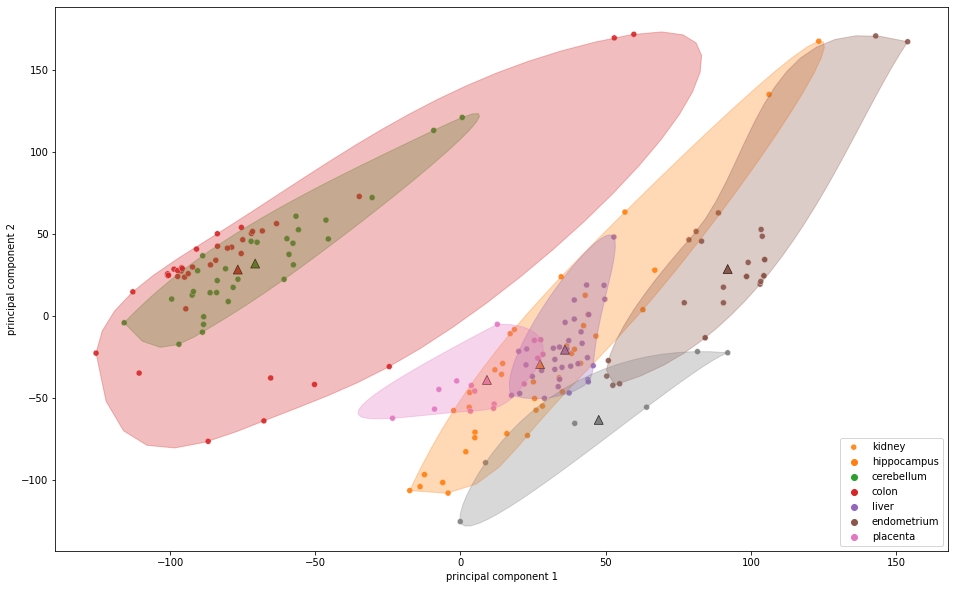

In [21]:
plt.figure(figsize=(16,10))
color_pal = sns.color_palette("tab10", len(np.unique(y_test))+1)[1:8]
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=color_pal,
    data=df_reduced_test,
    legend="full",
    alpha=0.9
)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", 
                     hue="y", palette=color_pal, data=df_centroid_test, s=80, 
                     ec='black', legend=False, ax=ax, marker='^', alpha=1)

ax.legend(labels=['kidney', 'hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium', 'placenta'])

for i in df_reduced_test.y.unique():
    points = df_reduced_test[df_reduced_test.y == i][['principal component 1', 'principal component 2']].values
    
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    if i>=0:
      plt.fill(interp_x, interp_y, '--', alpha=0.3, color=color_pal[i])

plt.show()

In [22]:
score_dbsacn_s = silhouette_score(X, y_test, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(X, y_test)
print('Silhouette Coefficient: %.4f' % score_dbsacn_s)
print('DB Index: %.4f' % score_dbsacn_d)

Silhouette Coefficient: 0.3142
DB Index: 1.3151


# 3. Investigar sobre el Agglomerative Hierarchical Clustering 

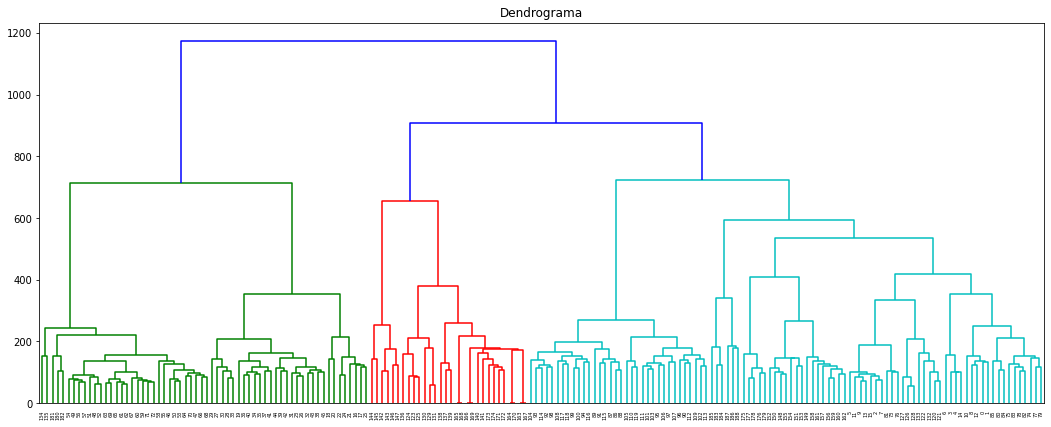

In [ ]:
plt.figure(figsize=(18, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(X_standardized, method='ward'))

In [ ]:
model_AggClus = AgglomerativeClustering(n_clusters=7)
yAggClus = model_AggClus.fit(X_standardized)
yAggClus_2 = model_AggClus.fit_predict(X_standardized)
clusters = np.unique(yAggClus_2)
print(clusters)

[0 1 2 3 4 5 6]


Uniformizando ID de cada cluster

In [ ]:
df_y_AggClus = pd.DataFrame(data = yAggClus_2, columns = ['pred'])
df_y_AggClus["label"] = ""
tissue = {0:'kidney',2:'hippocampus', 4:'cerebellum', 3:'colon', 1:'liver', 5:'endometrium' , 6:'placenta'}
df_y_AggClus.label = [tissue[item] for item in df_y_AggClus.pred]
tissue = {'kidney': 0,'hippocampus': 1, 'cerebellum':2, 'colon':3, 'liver':4, 'endometrium':5 , 'placenta':6}
df_y_AggClus.pred = [tissue[item] for item in df_y_AggClus.label]

Comparando cluster predicted con test

In [ ]:
df_compare = pd.DataFrame(df_y_AggClus.pred)
df_compare["test"] = y_test

In [ ]:
pd.set_option('display.max_rows', df_compare.shape[0]+1)
df_compare

,pred,test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Visualizando los clusters de Agglomerative Clustering usando PCA con 2 componentes 

In [ ]:
pca_c2 = PCA(n_components=2)
X_reduced_c2 = pca_c2.fit_transform(X_standardized)

In [ ]:
df_reduced_AggClus = pd.DataFrame(data = X_reduced_c2, columns = ['principal component 1', 'principal component 2'])
df_reduced_AggClus["y"] = yAggClus_2

In [ ]:
#calculate centroids
df_centroid_AggClus = pd.DataFrame()
for i in df_reduced_AggClus.y.unique():
  points_of_cluster_0 = df_reduced_AggClus[df_reduced_AggClus["y"]==i]
  centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
  dfc = pd.DataFrame(centroid_of_cluster_0)
  dfc = dfc.T
  df_centroid_AggClus = pd.concat([df_centroid_AggClus,dfc])

print(df_centroid_AggClus)

   principal component 1  principal component 2    y
0              11.938918             -40.080337  0.0
0             -71.078556              31.787006  1.0
0             -87.205737              31.978924  2.0
0              35.966951             -20.605050  3.0
0              87.286315              16.930213  4.0
0             106.521472             163.672165  5.0
0              47.590871             -63.357155  6.0


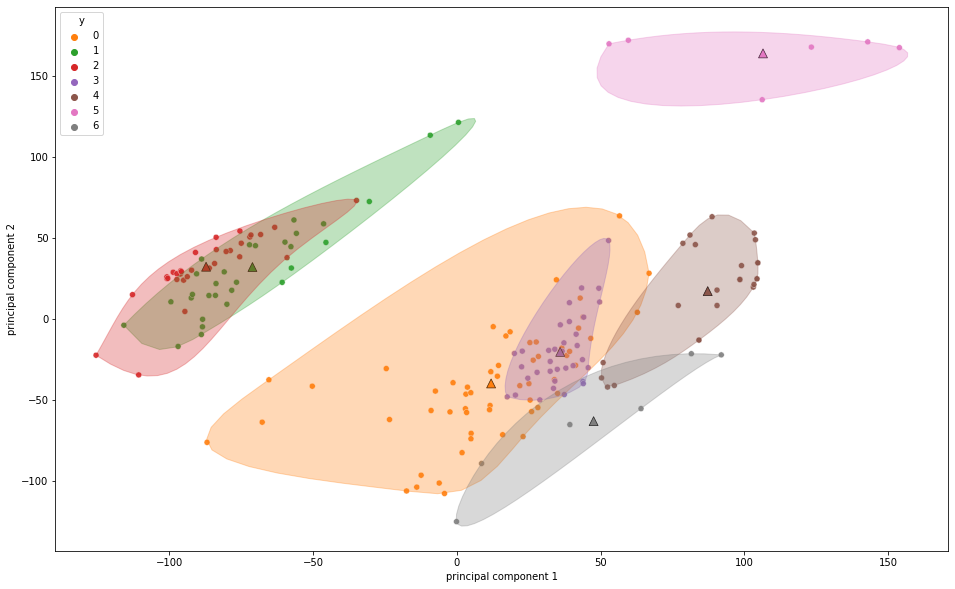

In [ ]:
plt.figure(figsize=(16,10))
color_pal = sns.color_palette("tab10", len(clusters)+1)[1:8]
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=color_pal,
    data=df_reduced_AggClus,
    legend="full",
    alpha=0.9
)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", 
                     hue="y", palette=color_pal, data=df_centroid_AggClus, 
                     s=80, ec='black', legend=False, ax=ax, marker='^', alpha=1)

for i in df_reduced_AggClus.y.unique():
    points = df_reduced_AggClus[df_reduced_AggClus.y == i][['principal component 1', 'principal component 2']].values
    
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    if i>=0:
      plt.fill(interp_x, interp_y, '--', alpha=0.3, color=color_pal[i])

plt.show()

              precision    recall  f1-score   support

           0       0.65      0.95      0.77        39
           1       1.00      0.97      0.98        31
           2       0.97      0.82      0.89        38
           3       1.00      1.00      1.00        34
           4       1.00      0.92      0.96        26
           5       0.00      0.00      0.00        15
           6       1.00      1.00      1.00         6

    accuracy                           0.86       189
   macro avg       0.80      0.81      0.80       189
weighted avg       0.84      0.86      0.84       189



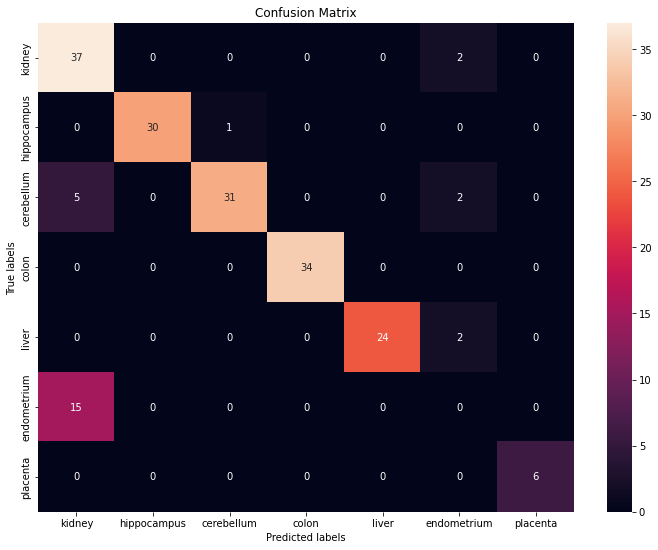

In [ ]:
cm = confusion_matrix(y_test, yAggClus_2)
print(classification_report(y_test, yAggClus_2))

fig, ax= plt.subplots(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 
ax.yaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 

In [ ]:
score_dbsacn_s = silhouette_score(X_standardized, yAggClus_2, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(X_standardized, yAggClus_2)
print('Silhouette Coefficient: %.4f' % score_dbsacn_s)
print('DB Index: %.4f' % score_dbsacn_d)

Silhouette Coefficient: 0.2261
DB Index: 1.5889


# 3. Reducir Complejidad usando Principal component analysis:

In [29]:
pca = PCA(0.9)
X_reduced = pca.fit_transform(X_standardized)
n_components = pca.n_components_

In [30]:
pca_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var_dif = np.round(pca.explained_variance_ratio_, decimals=4)*100
print('Variacion individual de {} principal components:'.format(n_components))
print('{}'.format(np.round(pca.explained_variance_ratio_, decimals=4)*100))
print('Variacion acumulada de {} principal components:'.format(n_components))
print('{}'.format(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)))

Variacion individual de 71 principal components:
[19.51 12.33  9.3   6.73  4.98  4.15  3.46  2.2   1.98  1.71  1.55  1.22
  1.18  1.    0.89  0.82  0.8   0.67  0.64  0.6   0.57  0.54  0.49  0.48
  0.45  0.43  0.42  0.41  0.39  0.38  0.36  0.35  0.35  0.33  0.33  0.31
  0.31  0.3   0.29  0.29  0.28  0.27  0.27  0.26  0.25  0.25  0.24  0.24
  0.23  0.23  0.23  0.22  0.22  0.22  0.21  0.21  0.2   0.2   0.2   0.2
  0.19  0.19  0.19  0.19  0.18  0.18  0.18  0.17  0.17  0.17  0.17]
Variacion acumulada de 71 principal components:
[19.51 31.84 41.14 47.87 52.85 57.   60.46 62.66 64.64 66.35 67.9  69.12
 70.3  71.3  72.19 73.01 73.81 74.48 75.12 75.72 76.29 76.83 77.32 77.8
 78.25 78.68 79.1  79.51 79.9  80.28 80.64 80.99 81.34 81.67 82.   82.31
 82.62 82.92 83.21 83.5  83.78 84.05 84.32 84.58 84.83 85.08 85.32 85.56
 85.79 86.02 86.25 86.47 86.69 86.91 87.12 87.33 87.53 87.73 87.93 88.13
 88.32 88.51 88.7  88.89 89.07 89.25 89.43 89.6  89.77 89.94 90.11]


In [31]:
X_reduced

array([[  4.98919233, -70.90596462,  26.73909576, ...,  -0.69246519,
         -0.61136263,  10.71570215],
       [ 23.0598108 , -72.89850548,  17.80458944, ...,  13.54972547,
          0.86749789,  -1.85073404],
       [ 36.55742584, -18.22002691,  40.39809547, ...,   3.25564241,
          2.67983128,  -1.62725956],
       ...,
       [ 64.08570244, -55.61360293,  16.83583267, ...,   1.95019521,
         -0.33605277,  -0.16047261],
       [ 81.58783591, -21.72203934,  21.24747056, ...,  -1.96563167,
          1.88342273,  -0.38578526],
       [ 92.00688671, -22.45069167,  20.31594226, ...,  -0.54148733,
         -1.09254086,   0.61309628]])

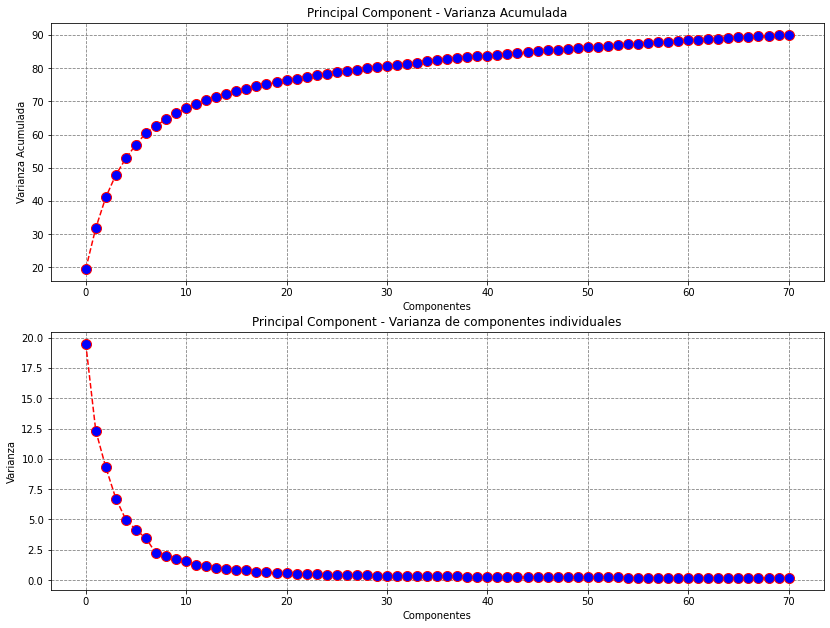

In [32]:
fig_var, axs_var = plt.subplots(2, 1,figsize=(12,9))
fig_var.tight_layout(pad=3.0)

axs_var[0].plot(pca_var, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0].set_title('Principal Component - Varianza Acumulada')
axs_var[0].set_xlabel('Componentes')
axs_var[0].set_ylabel('Varianza Acumulada')
axs_var[0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1].plot(var_dif, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1].set_title('Principal Component - Varianza de componentes individuales')
axs_var[1].set_xlabel('Componentes')
axs_var[1].set_ylabel('Varianza')
axs_var[1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1].xaxis.grid(color='gray', linestyle='dashed')



In [33]:
X_principal = X_reduced

 ## 2) Implementar DBScan

In [ ]:
class P2_DBSCAN:
  def __init__(self,eps,min_samples,X):
      self.eps = eps
      self.min_samples = min_samples
      self.X = X
      
  def region_query (self,p):
    eps = self.eps
    X = self.X
    return [item<=eps for item in np.sqrt(((X-p)**2).sum(axis = 1))]

  def index_set(self,y):
    return set(np.array((np.where(y == True))).flatten())

  def find_neighbors(self):
    eps = self.eps
    X = self.X
    m, d = X.shape
    neighbors = [] 
    for element in X:
      rq = np.array(self.region_query (element))
      neighbors.append(self.index_set(rq))
    
    assert len (neighbors) == m
    return neighbors

  def find_core_points (self, neighbors):
    s = self.min_samples
    core_set = set ()
    i=0
    for item in neighbors:
      if (len(item)>=s):
        core_set.add(i)   
      i+=1
    return core_set

  def expand_cluster (self,p, neighbors, core_set, visited, assignment):
    reachable = set (neighbors[p]) 
    while reachable:
        q = reachable.pop () 
        if q not in visited:
          visited.add (q)
          if q in core_set:
            reachable |= neighbors[q]
        if q not in assignment:
          assignment[q] = assignment[p]
  
  def fit_predict(self):
    eps = self.eps
    s = self.min_samples
    X = self.X

    clusters = []
    point_to_cluster = {}
    
    neighbors = self.find_neighbors()
    core_set = self.find_core_points(neighbors)
    
    assignment = {}
    next_cluster_id = 0

    visited = set ()
    for i in core_set: 
        if i not in visited:
            visited.add (i) 
            assignment[i] = next_cluster_id
            self.expand_cluster (i, neighbors, core_set,
                            visited, assignment)
            next_cluster_id += 1

    #Se asigna -1 a los puntos no clusterizados
    for i in range(len(X)):
      if i not in assignment:
        assignment[i]= -1

    assignment = {k: v for k, v in sorted(assignment.items() ,  key=lambda item: item[0])}

    return assignment, core_set


Buscar los hiperparametros adecuados

In [ ]:
eps_sample = np.arange(1,250,5)
min_samples=6
clusters = []
accuracy = []
silhouette = []
db =[]

for i in eps_sample:
  model_dbscan = P2_DBSCAN(eps=i, min_samples=min_samples, X=X_principal)
  assignment, core_set = model_dbscan.fit_predict()
  y_result = np.array(list(assignment.values()))
  clusters.append(len(np.unique(y_result)))
  accuracy.append(accuracy_score(y_test, y_result))
  
  if len(np.unique(y_result))>1:
    score_silh = silhouette_score(X_principal, y_result, metric='euclidean')
    score_db = davies_bouldin_score(X_principal, y_result)
  else:
    score_silh = -1
    score_db = 0

  silhouette.append(score_silh)
  db.append(score_db)


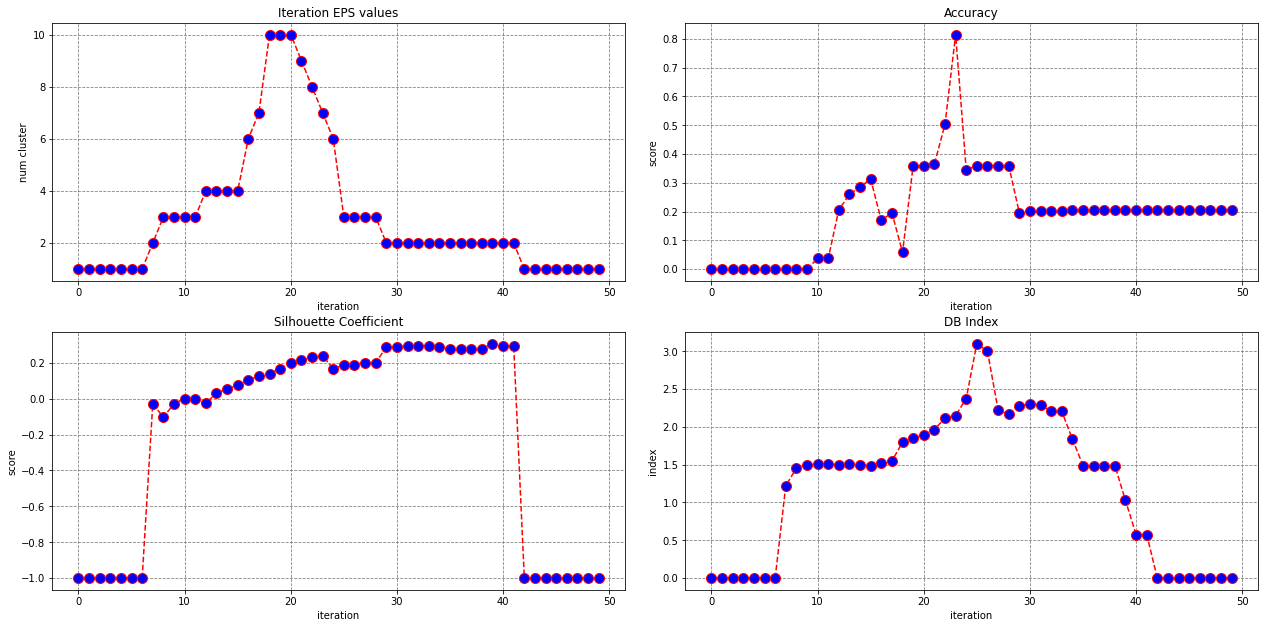

In [ ]:
fig_var, axs_var = plt.subplots(2, 2,figsize=(18,9))
fig_var.tight_layout(pad=3.0)

axs_var[0,0].plot(clusters, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0,0].set_title('Iteration EPS values')
axs_var[0,0].set_xlabel('iteration')
axs_var[0,0].set_ylabel('num cluster')
axs_var[0,0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0,0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[0,1].plot(accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0,1].set_title('Accuracy')
axs_var[0,1].set_xlabel('iteration')
axs_var[0,1].set_ylabel('score')
axs_var[0,1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0,1].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1,0].plot(silhouette, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1,0].set_title('Silhouette Coefficient')
axs_var[1,0].set_xlabel('iteration')
axs_var[1,0].set_ylabel('score')
axs_var[1,0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1,0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1,1].plot(db, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1,1].set_title('DB Index')
axs_var[1,1].set_xlabel('iteration')
axs_var[1,1].set_ylabel('index')
axs_var[1,1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1,1].xaxis.grid(color='gray', linestyle='dashed')


In [ ]:
eps=eps_sample[23]
#eps=eps_sample[25]
print(eps)

116


In [ ]:
min_minsamples= 1
max_minsamples= 30
clusters = []
accuracy = []
silhouette = []
db =[]

for i in range(min_minsamples, max_minsamples):
  model_dbscan = P2_DBSCAN(eps=eps, min_samples=i, X=X_principal)
  assignment, core_set = model_dbscan.fit_predict()
  y_result = np.array(list(assignment.values()))
  clusters.append(len(np.unique(y_result)))
  accuracy.append(accuracy_score(y_test, y_result))

  if len(np.unique(y_result))>1:
    score_silh = silhouette_score(X_principal, y_result, metric='euclidean')
    score_db = davies_bouldin_score(X_principal, y_result)
  else:
    score_silh = -1
    score_db = 0

  silhouette.append(score_silh)
  db.append(score_db)

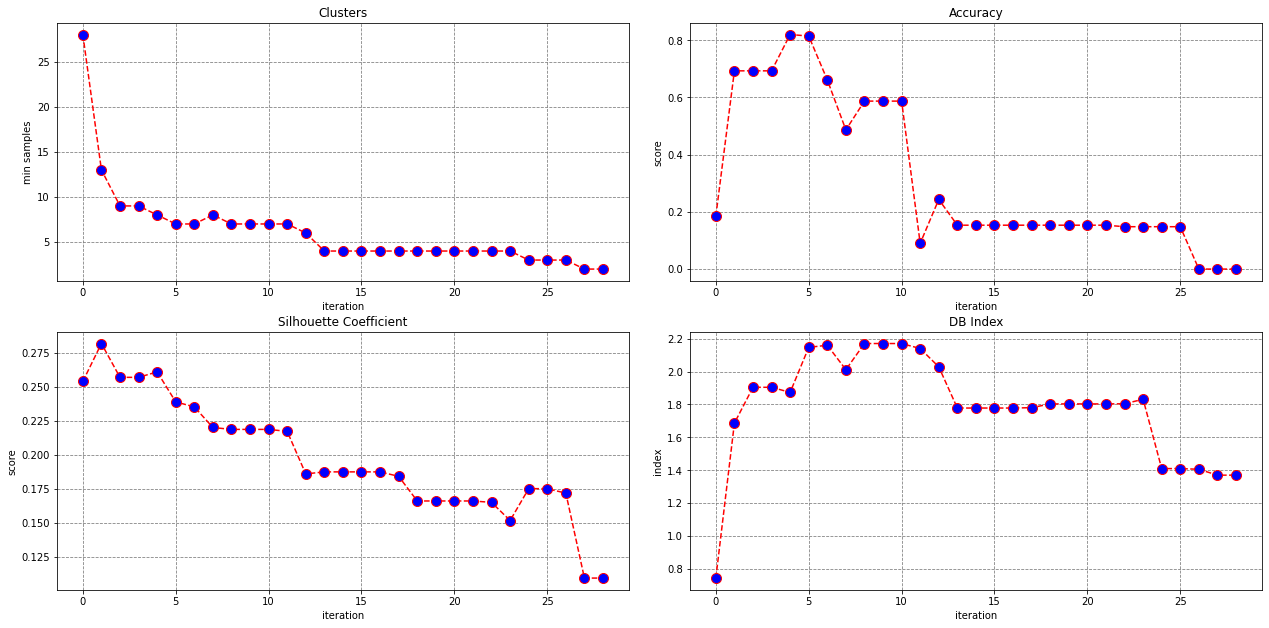

In [ ]:
fig_var, axs_var = plt.subplots(2, 2,figsize=(18,9))
fig_var.tight_layout(pad=3.0)

axs_var[0,0].plot(clusters, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0,0].set_title('Clusters')
axs_var[0,0].set_xlabel('iteration')
axs_var[0,0].set_ylabel('min samples')
axs_var[0,0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0,0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[0,1].plot(accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0,1].set_title('Accuracy')
axs_var[0,1].set_xlabel('iteration')
axs_var[0,1].set_ylabel('score')
axs_var[0,1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0,1].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1,0].plot(silhouette, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1,0].set_title('Silhouette Coefficient')
axs_var[1,0].set_xlabel('iteration')
axs_var[1,0].set_ylabel('score')
axs_var[1,0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1,0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1,1].plot(db, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1,1].set_title('DB Index')
axs_var[1,1].set_xlabel('iteration')
axs_var[1,1].set_ylabel('index')
axs_var[1,1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1,1].xaxis.grid(color='gray', linestyle='dashed')


Ejecutar el modelo con los hiperparametros identificados

In [ ]:
min_samples=5

In [ ]:
model = P2_DBSCAN(eps=eps, min_samples=min_samples, X=X_principal)
assignment, core_set = model.fit_predict()

In [ ]:
df_p2_dbscan = pd.DataFrame(assignment.items(), columns=['id', 'pred'])

In [ ]:
df_compare = pd.DataFrame(df_p2_dbscan["pred"])
df_compare["test"] = y_test

In [ ]:
#pd.set_option('display.max_rows', df_compare.shape[0]+1)
df_compare

,pred,test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,-1,0
7,0,0
8,0,0
9,0,0


In [ ]:
y_pred = np.array(df_p2_dbscan["pred"])

# 5. Evaluar la calidad de cada cluster verificando si los elementos en cada grupo, efectivamente pertenecen al mismo tipo de tejido.

In [ ]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

score_dbsacn_s = silhouette_score(X_principal, y_pred, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(X_principal, y_pred)
print('Silhouette Coefficient: %.4f' % score_dbsacn_s)
print('DB Index: %.4f' % score_dbsacn_d)

Silhouette Coefficient: 0.2609
DB Index: 1.8737


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.90      0.95        39
           1       1.00      0.94      0.97        31
           2       1.00      0.76      0.87        38
           3       1.00      0.97      0.99        34
           4       1.00      0.54      0.70        26
           5       1.00      1.00      1.00        15
           6       0.00      0.00      0.00         6

    accuracy                           0.82       189
   macro avg       0.75      0.64      0.68       189
weighted avg       0.97      0.82      0.88       189



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


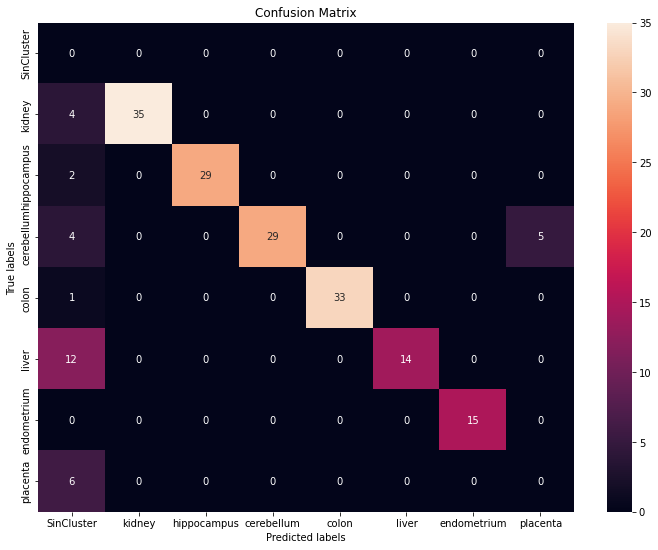

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

fig, ax= plt.subplots(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(['SinCluster','kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 
ax.yaxis.set_ticklabels(['SinCluster','kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 


In [ ]:
score_dbsacn_s = silhouette_score(X_principal, y_pred, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(X_principal, y_pred)
print('Silhouette Coefficient: %.4f' % score_dbsacn_s)
print('DB Index: %.4f' % score_dbsacn_d)

Silhouette Coefficient: 0.2609
DB Index: 1.8737


# 6. Visualizar cada cluster colocando el nombre del tejido con m´as frecuencia en cada cluster.

In [ ]:
n_components=2
pca_c2 = PCA(n_components=n_components)
X_reduced_c2 = pca_c2.fit_transform(X_standardized)

In [ ]:
pca_c2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
df_reduced = pd.DataFrame(data = X_reduced_c2, columns = ['principal component 1', 'principal component 2'])
df_reduced["y"] = y_pred

#df_reduced["cluster"] = y_pred
#df_reduced["y"] = " "
#tissue = {-1:'-1: Sin Cluster',0:'0: kidney',1:'1: hippocampus', 2:'2: cerebellum', 3:'3: colon', 4:'4: liver', 5:'5: endometrium' , 6:'6: placenta'}
#df_reduced.y = [tissue[item] for item in df_reduced.cluster]

In [ ]:
df_reduced.head(10)

,principal component 1,principal component 2,y
0,4.989192,-70.905965,0
1,23.059811,-72.898505,0
2,36.557426,-18.220027,0
3,62.805907,3.828831,0
4,41.323546,-28.886986,0
5,42.363589,-5.918425,0
6,66.895087,27.940051,-1
7,36.090278,-20.259675,0
8,25.512289,-50.344738,0
9,38.261064,-22.771333,0


In [ ]:
#calculate centroids
df_centroid = pd.DataFrame()
for i in np.unique(y_pred):
  points_of_cluster_0 = df_reduced[df_reduced["y"]==i]
  centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
  dfc = pd.DataFrame(centroid_of_cluster_0)
  dfc = dfc.T
  dfc["y"] = int(dfc["y"])
  df_centroid = pd.concat([df_centroid,dfc])

print(df_centroid)


   principal component 1  principal component 2  y
0              59.254996              36.612276 -1
0              22.172818             -39.107462  0
0             -75.267923              26.100480  1
0             -89.173053              32.678636  2
0              35.830753             -20.347489  3
0              89.291655               7.827643  4
0               9.104235             -38.984061  5
0             -58.943354             -50.189624  6


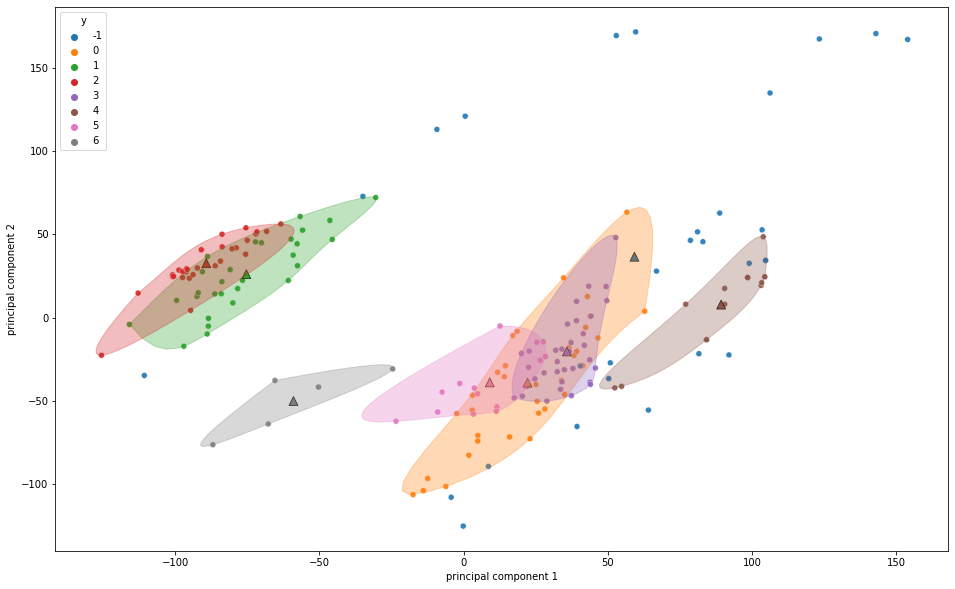

In [ ]:
plt.figure(figsize=(16,10))
color_pal = sns.color_palette("tab10", len(np.unique(y_pred)))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=color_pal,
    data=df_reduced,
    legend="full",
    alpha=0.9
)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="y", palette=color_pal, data=df_centroid, s=80, ec='black', legend=False, ax=ax, marker='^', alpha=1)

for i in df_reduced.y.unique():
    points = df_reduced[df_reduced.y == i][['principal component 1', 'principal component 2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    # Se valida que no agrupe a los valores sin cluster
    if i>=0:
      plt.fill(interp_x, interp_y, '--', alpha=0.3, color=color_pal[i+1])

plt.show()

 ## 2) Implementar K-Means

In [23]:
class Point:
  def __init__(self, coordinates):
    self.coordinates = coordinates
    
class K_Means:
  def __init__(self,X, k):
      self.k = k
      self.X = X

  def euclidean_distance(self,p1, p2):
    num_dims = len(p1.coordinates)
    distance = 0
    for i in range(num_dims):
      distance += (p1.coordinates[i] - p2.coordinates[i]) ** 2
    return distance ** 0.5

  def assign_points_to_clusters(self,centroids):
    X= self.X 
    labels = []
    for x in X:
      min_dist = float("inf")
      best_centroid = 0
      for index, centroid in enumerate(centroids):
        dist = self.euclidean_distance(x, centroid)
        if dist < min_dist:
          min_dist = dist
          best_centroid = index
      labels.append((x, best_centroid))
    return labels
    
  def calculate_mean(self,labels, cluster, n_dims):
    frecuency = 0
    mean = Point([0] * n_dims)
    for point, label in labels:
      if label == cluster:
        frecuency += 1
        for i in range(n_dims):
          mean.coordinates[i] += point.coordinates[i]

    for i in range(n_dims):
      mean.coordinates[i] /= frecuency

    return mean

  def fit_predict(self):
    k= self.k
    X= self.X 
    # Inicializar k centros
    random.seed(1811)
    centroids = random.sample(X, k)
    labels = self.assign_points_to_clusters(centroids)
    n_dims = len(X[0].coordinates)
    while True:
      means = []
      for i in range(k):
        means.append(self.calculate_mean(labels, i, n_dims))
      
      if all(
        self.euclidean_distance(old_centroid, new_centroid) < 0.0001
        for old_centroid, new_centroid in zip(centroids, means)
      ):
        break

      centroids = means[:]
      labels = self.assign_points_to_clusters(centroids)
    return centroids, labels

In [24]:
pca_cx = PCA(n_components=5)
X_reduced_cx = pca_cx.fit_transform(X_standardized)
points = [Point(list(x)) for x in X_reduced_cx]
k=7
model = K_Means(points,k)
centroids, labels = model.fit_predict()
y_pred = np.array([label[1] for label in labels])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 4, 6, 4, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 4, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 5, 6, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 1, 1, 1, 3, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 5, 2, 2, 1, 1, 3, 0, 0, 0])

In [25]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4, 4,
       0, 0, 2, 1, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 0, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6])

Uniformizando el ID de cada cluster

In [26]:
original_cluster_ids = {"kidney": 0, "hippocampus": 1, "cerebellum": 2, "colon": 3, "liver": 4, "endometrium": 5, "placenta": 6}
kmeans_cluster_ids = {0: "liver", 1: "kidney", 2: "placenta", 3: "colon", 4: "endometrium", 5: "cerebellum", 6: "hippocampus"}
y_pred_updated = np.array([original_cluster_ids[kmeans_cluster_ids[yi]] for yi in y_pred])

In [27]:
accuracy_score(y_test, y_pred_updated)

0.8042328042328042

Experimentamos con varios valores de num_components(PCA)

In [34]:
num_components_list = np.arange(1, 50, 2)
accuracy = []
silhouette = []
db = []
k=7

for nc in num_components_list:
  pca_cx = PCA(n_components=nc)
  X_reduced_cx = pca_cx.fit_transform(X_standardized)
  points = [Point(list(x)) for x in X_reduced_cx]
  model = K_Means(points,k)
  centroids, labels = model.fit_predict()
  y_pred = np.array([label[1] for label in labels])
  y_pred = np.array([original_cluster_ids[kmeans_cluster_ids[yi]] for yi in y_pred])

  accuracy.append(accuracy_score(y_test, y_pred))

  if len(np.unique(y_pred)) > 1:
    score_silh = silhouette_score(X_principal, y_pred, metric='euclidean')
    score_db = davies_bouldin_score(X_principal, y_pred)
  else:
    score_silh = -1
    score_db = 0

  print(nc, accuracy_score(y_test, y_pred), score_silh, score_db)

  silhouette.append(score_silh)
  db.append(score_db)

1 0.47619047619047616 0.02955284352727411 3.5573059356450636
3 0.7037037037037037 0.1895339976098092 1.6975125547048115
5 0.8042328042328042 0.2641745316373613 1.5195523741861223
7 0.7936507936507936 0.2716072526502295 1.5882793294433186
9 0.8042328042328042 0.27443039059634095 1.545133428441229
11 0.7883597883597884 0.2720151188328497 1.4812465198317535
13 0.7883597883597884 0.2720151188328497 1.4812465198317535
15 0.7883597883597884 0.2720151188328497 1.4812465198317535
17 0.7883597883597884 0.2720151188328497 1.4812465198317535
19 0.7883597883597884 0.2720151188328497 1.4812465198317535
21 0.7883597883597884 0.2720151188328497 1.4812465198317535
23 0.7883597883597884 0.2720151188328497 1.4812465198317535
25 0.7883597883597884 0.2720151188328497 1.4812465198317535
27 0.7883597883597884 0.2720151188328497 1.4812465198317535
29 0.7883597883597884 0.2720151188328497 1.4812465198317535
31 0.7883597883597884 0.2720151188328497 1.4812465198317535
33 0.7883597883597884 0.2720151188328497 1.

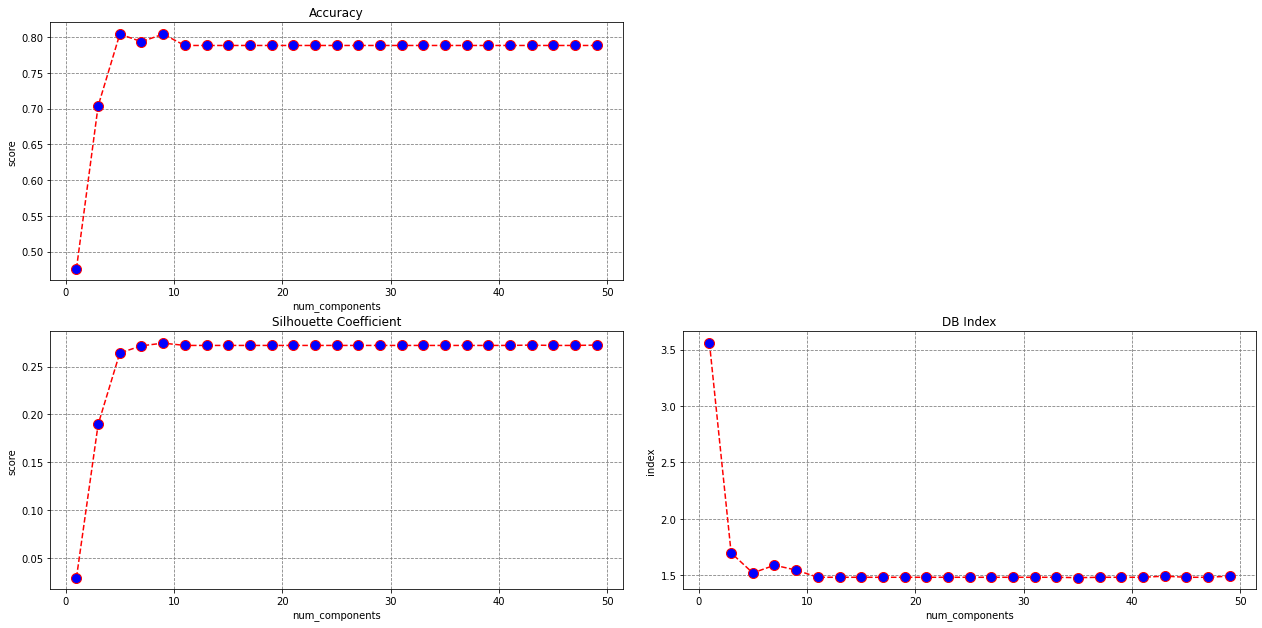

In [35]:
fig_var, axs_var = plt.subplots(2, 2,figsize=(18,9))
fig_var.tight_layout(pad=3.0)

fig_var.delaxes(axs_var[0][1])

axs_var[0,0].plot(num_components_list, accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0,0].set_title('Accuracy')
axs_var[0,0].set_xlabel('num_components')
axs_var[0,0].set_ylabel('score')
axs_var[0,0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0,0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1,0].plot(num_components_list, silhouette, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1,0].set_title('Silhouette Coefficient')
axs_var[1,0].set_xlabel('num_components')
axs_var[1,0].set_ylabel('score')
axs_var[1,0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1,0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1,1].plot(num_components_list, db, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1,1].set_title('DB Index')
axs_var[1,1].set_xlabel('num_components')
axs_var[1,1].set_ylabel('index')
axs_var[1,1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1,1].xaxis.grid(color='gray', linestyle='dashed')

Ejecutar el modelo con los hiperparametros identificados

In [36]:
  pca = PCA(n_components=5)
  X_reduced = pca.fit_transform(X_standardized)
  points = [Point(list(x)) for x in X_reduced]
  model = K_Means(points, k)
  centroids, labels = model.fit_predict()
  y_pred = np.array([label[1] for label in labels])
  y_pred = np.array([original_cluster_ids[kmeans_cluster_ids[yi]] for yi in y_pred])

In [37]:
df_compare = pd.DataFrame(columns=["label", "test", "pred"])
df_compare["label"] = df_y.x
df_compare["test"] = y_test
df_compare["pred"] = np.array([label[1] for label in labels])
df_compare

,label,test,pred
0,kidney,0,1
1,kidney,0,1
2,kidney,0,1
3,kidney,0,1
4,kidney,0,1
...,...,...,...
184,placenta,6,1
185,placenta,6,3
186,placenta,6,0
187,placenta,6,0


In [38]:
score_kmeans_silhoutte = silhouette_score(X_principal, y_pred, metric='euclidean')
score_kmeans_davies = davies_bouldin_score(X_principal, y_pred)
score_kmeans_accuracy = accuracy_score(y_test, y_pred)
print('Silhouette Coefficient: %.4f' % score_kmeans_silhoutte)
print('DB Index: %.4f' % score_kmeans_davies)
print('Accuracy: %.4f' % score_kmeans_accuracy)

Silhouette Coefficient: 0.2642
DB Index: 1.5196
Accuracy: 0.8042


              precision    recall  f1-score   support

           0       0.69      0.92      0.79        39
           1       1.00      0.94      0.97        31
           2       1.00      0.76      0.87        38
           3       0.92      1.00      0.96        34
           4       0.89      0.92      0.91        26
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         6

    accuracy                           0.80       189
   macro avg       0.64      0.65      0.64       189
weighted avg       0.80      0.80      0.79       189



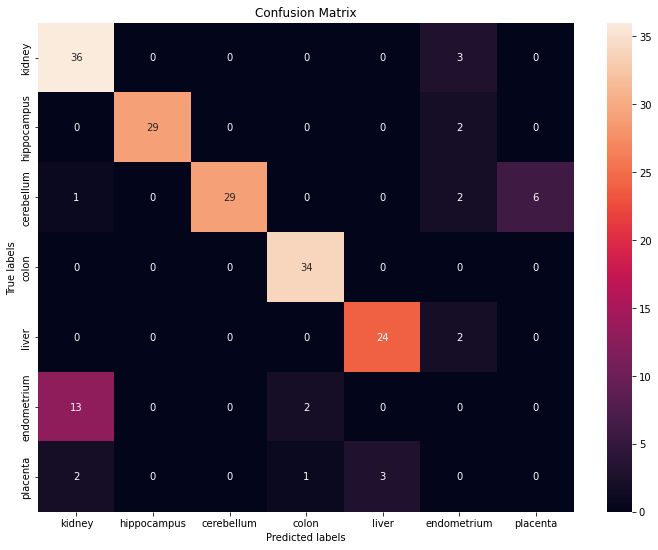

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

fig, ax= plt.subplots(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 
ax.yaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 


In [41]:
n_components=2
pca_c2 = PCA(n_components=n_components)
X_reduced_c2 = pca_c2.fit_transform(X_standardized)

In [42]:
df_reduced = pd.DataFrame(data = X_reduced_c2, columns = ['principal component 1', 'principal component 2'])
df_reduced["y"] = y_pred

In [44]:
#calculate centroids
df_centroid = pd.DataFrame()
for i in np.unique(y_pred):
  points_of_cluster_0 = df_reduced[df_reduced["y"]==i]
  centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
  dfc = pd.DataFrame(centroid_of_cluster_0)
  dfc = dfc.T
  dfc["y"] = int(dfc["y"])
  df_centroid = pd.concat([df_centroid,dfc])

print(df_centroid)

   principal component 1  principal component 2  y
0              16.323018             -44.317558  0
0             -75.267923              26.100480  1
0             -86.048301              35.973742  2
0              35.568501             -21.738314  3
0              86.390815              11.353288  4
0              76.344868             142.186181  5
0             -84.386130             -46.256035  6


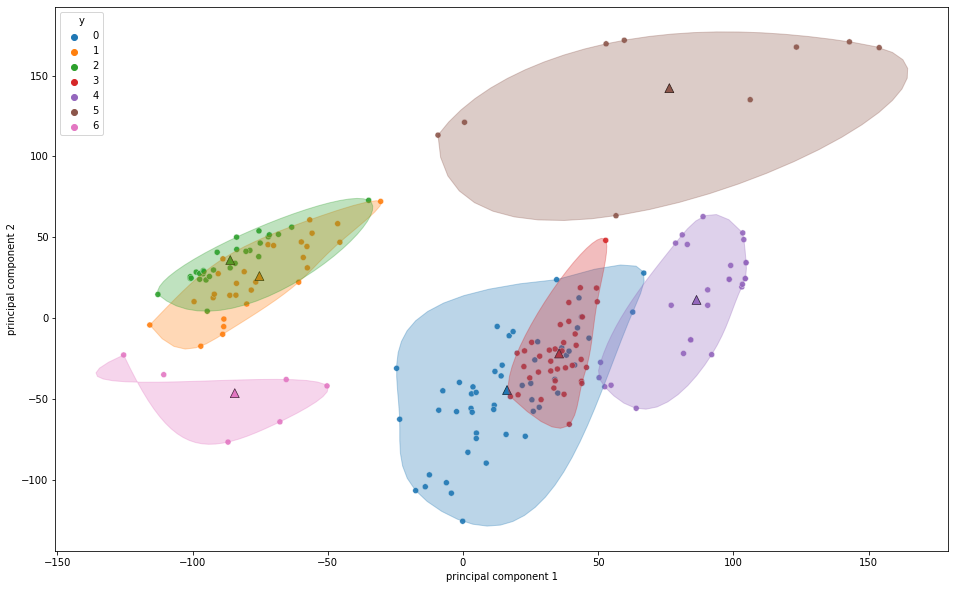

In [46]:
plt.figure(figsize=(16,10))
color_pal = sns.color_palette("tab10", len(np.unique(y_pred)))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=color_pal,
    data=df_reduced,
    legend="full",
    alpha=0.9
)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="y", palette=color_pal, data=df_centroid, s=80, ec='black', legend=False, ax=ax, marker='^', alpha=1)

for i in df_reduced.y.unique():
    points = df_reduced[df_reduced.y == i][['principal component 1', 'principal component 2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    # Se valida que no agrupe a los valores sin cluster
    if i>=0:
      plt.fill(interp_x, interp_y, '--', alpha=0.3, color=color_pal[i])

plt.show()